In [6]:
# COGS109
# Homework 4
# Gustav Sto. Tomas
# A15358078

import pandas as pd
import pandas.tseries
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import random

df = pd.read_csv('hw3_divseq_data.csv')

In [7]:
df.head()

,Lars2,Malat1,mature
0,9.95,6.69,1
1,10.54,8.53,1
2,6.58,8.74,1
3,7.49,9.09,1
4,7.42,9.87,1


In [3]:
#1a

n = 100
p = (1-(1/n))

print('1a) For example with n=100:', p, '. The probability that the first bootstrap sample is not the jth observation is 1-(1/n). Since we sample and replace, the samples are independent of each other and always show the same probability.')
print()

#1b
print('1b) The probability that the second bootstrap sample is not the jth observation is the same as in 1a): p = 1-(1/n)')
print()

#1c

p = (1-(1/n)**n)
print('1c) Again, since the probability of the sample is independent of any other samples, it will be 1-(1/n) for each and avery samples tat we take = 1-(1/n)^n. This also means that the revsersed is true: if the probability of taking a given sample is 1/100, then the probability of not taking that same sample is 99/100 and vice versa. = 1-(1/n)^n.')
print()

#1d
n = 5
nx = 1-(1/n)
p = 1-(nx**n)
#this is equal to:
q = 1-(1-(1/n))**n
print(q)

print('1d) The probability that the jth observation is in the bootstrap sample is 1-(1-(1/5))^5 =', p,)
print()

#1e
n = 100
nx = 1-(1/n)
p = 1-(nx**n)
#this is equal to:
q = 1-(1-(1/n))**n
print(q)

print('1e) The probability that the jth observation is in the bootstrap sample is 1-(1-(1/100))^100 =', p,)
print()

#1f)
n = 10000
nx = 1-(1/n)
p = 1-(nx**n)
#this is equal to:
q = 1-(1-(1/n))**n
print(q)
print('1f) The probability that the jth observation is in the bootstrap sample is 1-(1-(1/10000))^10000 =', p,)

1a) For example with n=100: 0.99 . The probability that the first bootstrap sample is not the jth observation is 1-(1/n). Since we sample and replace, the samples are independent of each other and always show the same probability.

1b) The probability that the second bootstrap sample is not the jth observation is the same as in 1a): p = 1-(1/n)

1c) Again, since the probability of the sample is independent of any other samples, it will be 1-(1/n) for each and avery samples tat we take = 1-(1/n)^n. This also means that the revsersed is true: if the probability of taking a given sample is 1/100, then the probability of not taking that same sample is 99/100 and vice versa. = 1-(1/n)^n.

0.6723199999999999
1d) The probability that the jth observation is in the bootstrap sample is 1-(1-(1/5))^5 = 0.6723199999999999

0.6339676587267709
1e) The probability that the jth observation is in the bootstrap sample is 1-(1-(1/100))^100 = 0.6339676587267709

0.6321389535670295
1f) The probability that

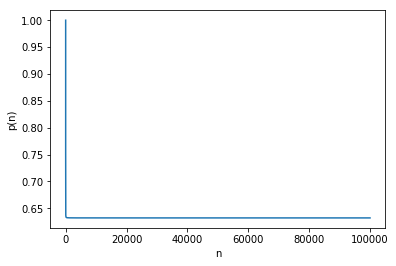


The p value drops very steeply from 1 to ca 0.63, which is roughly the averaage value from 1d,1e,, and 1f (+1h).


In [4]:
#1g
#
p = lambda n: (1-(1-1/n)**n)
x = np.arange(1,100000)
fig,ax = plt.subplots()
plt.plot(x,p(x))
plt.xlabel('n')
plt.ylabel('p(n)')
plt.show()

print()
print('The p value drops very steeply from 1 to ca 0.63, which is roughly the averaage value from 1d,1e,, and 1f (+1h).')

In [5]:
#1h

count = 0
for i in range(10000):
    res = np.random.randint(1, 101, size=100)
    if np.sum(res == 4) > 0: # 4-th observation is in the sample
        count += 1
        
print("The 4-th observation is in %f of trials." % (count/10000))

print('the value is the aproximately same as the one in 1d,1e,1f, and 1g.')

The 4-th observation is in 0.641300 of trials.
the value is the aproximately same as the one in 1d,1e,1f, and 1g.


In [8]:
#2a
logreg2 = smf.logit(formula = 'mature ~ Lars2 + Malat1', data=df).fit()
print(logreg2.summary())
print(logreg2.pvalues)
pred_both = df[['Lars2','Malat1']]

df['pred_both'] = logreg2.predict(pred_both)
df['pred_both_mature'] = 1*(df.pred_both > 0.5)
df['pred_both_immature'] = 1 *(df.pred_both < 0.5)

Optimization terminated successfully.
         Current function value: 0.196827
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 mature   No. Observations:                  817
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Oct 2017   Pseudo R-squ.:                  0.6088
Time:                        10:02:20   Log-Likelihood:                -160.81
converged:                       True   LL-Null:                       -411.04
                                        LLR p-value:                2.122e-109
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.5697      2.177    -11.743      0.000     -29.838     -21.302
Lars2          2.3119      0.

In [11]:
# 2a : confusion matrix

conf_mat = confusion_matrix(df.mature, df.pred_both_mature,)
print(conf_mat)

con = pd.DataFrame(data=conf_mat, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print(con)


correct_m = conf_mat[1,1]
correct_im = conf_mat[0,0]
correct = conf_mat[0,0]+conf_mat[1,1]
print()
print()
print('correctly predicted mature (TP):', correct_m)
print('correctly predicted immature (TN):', correct_im)
print('correctly predicted:', correct)
print('correctly predicted:', correct/len(df))

[[618  34]
 [ 45 120]]
               pred_immature  pred_mature
true_immature            618           34
true_mature               45          120


correctly predicted mature (TP): 120
correctly predicted immature (TN): 618
correctly predicted: 738
correctly predicted: 0.903304773562


In [12]:
#2 b and c

df['pred_both_20'] = 1*(df.pred_both > 0.2)
df['pred_both_80'] = 1*(df.pred_both > 0.8)



conf_mat2 = confusion_matrix(df.mature, df.pred_both_20,)
#print(conf_mat2)

conf_mat8 = confusion_matrix(df.mature, df.pred_both_80,)
#print(conf_mat8)

con2 = pd.DataFrame(data=conf_mat2, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print('confusion matrix with threshold 0.2:')
print(con2)
print()



specificity2 = conf_mat2[0][0]/(conf_mat2[0][0]+conf_mat2[0][1])
sensitivity2 = conf_mat2[1][1]/(conf_mat2[1][0]+conf_mat2[1][1])

#sensitivity2 = conf_mat2[0,0]/(conf_mat2[0,0]+conf_mat2[0,1])
print("Sensitivity 0.2: " + str(sensitivity2))
#specificity2 = conf_mat2[1,1]/(conf_mat2[1,0]+conf_mat2[1,1])
print("Specificity 0.2: " + str(specificity2))
print('with a threshold of 0.2, specificity is somewhat lower, but sensitivity is very high, meaning fewer false positives')

print()

con8 = pd.DataFrame(data=conf_mat8, index=['true_immature','true_mature'],columns=['pred_immature','pred_mature'])
print('confusion_matrix with threshold 0.8:')
print(con8)
print()


specificity8 = conf_mat8[0][0]/(conf_mat8[0][0]+conf_mat8[0][1])
sensitivity8 = conf_mat8[1][1]/(conf_mat8[1][0]+conf_mat8[1][1])

#sensitivity8 = conf_mat8[0,0]/(conf_mat8[0,0]+conf_mat8[0,1])
print("Sensitivity 0.8: " + str(sensitivity8))
#specificity8 = conf_mat8[1,1]/(conf_mat8[1,0]+conf_mat8[1,1])
print("Specificity 0.8: " + str(specificity8))
print('with a threshold of 0.8, specificity is somewhat higher but sensitivity is much lower, meaning more false negatives.')
print()
print('more actually mature neurons are correctly classified as mature with a threshold of 0.2. a threshold of 0.8 instead classifies even more of the immature neurons correctly than the bayesian (0.5) classifier died, but many more mature neurons are falsely classified as immature (false negatives). since we want to make better classifications for mature neurons, a threshold of 0.2 is to prefer.')


confusion matrix with threshold 0.2:
               pred_immature  pred_mature
true_immature            575           77
true_mature                7          158

Sensitivity 0.2: 0.957575757576
Specificity 0.2: 0.881901840491
with a threshold of 0.2, specificity is somewhat lower, but sensitivity is very high, meaning fewer false positives

confusion_matrix with threshold 0.8:
               pred_immature  pred_mature
true_immature            643            9
true_mature               90           75

Sensitivity 0.8: 0.454545454545
Specificity 0.8: 0.986196319018
with a threshold of 0.8, specificity is somewhat higher but sensitivity is much lower, meaning more false negatives.

more actually mature neurons are correctly classified as mature with a threshold of 0.2. a threshold of 0.8 instead classifies even more of the immature neurons correctly than the bayesian (0.5) classifier died, but many more mature neurons are falsely classified as immature (false negatives). since we want 

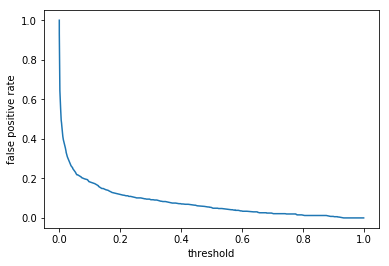

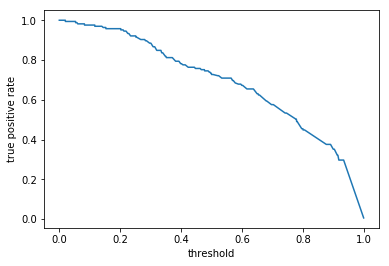

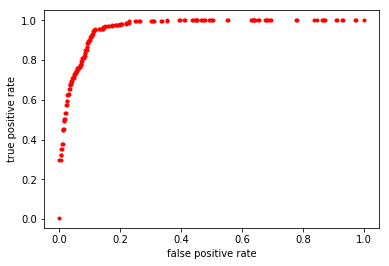

In [15]:
#2d, e, and f

y = df.mature
scores = df.pred_both
fpr, tpr, thresholds = roc_curve(y, scores)

fig, ax = plt.subplots()
plt.plot(thresholds,fpr)
plt.xlabel('threshold')
plt.ylabel('false positive rate')
plt.show()


fig,ax = plt.subplots()
plt.plot(thresholds,tpr)
plt.xlabel('threshold')
plt.ylabel('true positive rate')
plt.show()


fig,ax = plt.subplots()
plt.plot(fpr,tpr,'r.')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()


In [26]:
#3a
## etc, well time is up and the ideas aren't exaclt flowing.

import random

X = []
for i in range(len(df.mature)):
    X.append(df.mature[i])
#print(X)    

def shuf(x):
    random.shuffle(x)
    return x

stuff = []
x1 = shuf(X)
print(x1)
type(x1)
fold = 817/10


print(fold)
x1n = [i for i,val in enumerate(x1)]
x2n = [val for i,val in enumerate(x1)]
#print(x1n)
#print(x2n)
fold0 = [val for i,val in zip(x1n,x2n) if i < fold]
print(len(fold0))
fold1 = [val for i,val in zip(x1n,x2n) if i >fold and i < fold*2]
print(len(fold1))
fold2 = [val for i,val in zip(x1n,x2n) if i > fold*2 and i < fold*3]
print(len(fold2))
fold3 = [val for i,val in zip(x1n,x2n) if i > fold*3 and i < fold*4]
print(len(fold3))
fold4 = [val for i,val in zip(x1n,x2n) if i > fold*4 and i < fold*5]
print(len(fold4))
fold5 = [val for i,val in zip(x1n,x2n) if i > fold*5 and i < fold*6]
print(len(fold5))
fold6 = [val for i,val in zip(x1n,x2n) if i > fold*6 and i < fold*7]
print(len(fold6))
fold7 = [val for i,val in zip(x1n,x2n) if i > fold*7 and i < fold*8]
print(len(fold7))
fold8 = [val for i,val in zip(x1n,x2n) if i > fold*8 and i < fold*9]
print(len(fold8))
fold9 = [val for i,val in zip(x1n,x2n) if i > fold*9 and i > fold]
print(len(fold9))

print(fold0)
print(fold1)
print(fold2)
print(fold3)
print(fold4)
print(fold5)
print(fold6)
print(fold7)
print(fold8)
print(fold9)

##################
"""
df['fold0'] = fold0
df['fold1'] = fold1
df['fold2'] = fold2
df['fold3'] = fold3
df['fold4'] = fold4
df['fold5'] = fold5
df['fold6'] = fold6
df['fold7'] = fold7
df['fold8'] = fold8
df['fold9'] = fold9"""


#df['fold0','fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9'] = fold0,fold1,fold2,fold3,fold4,fold5,fold6,fold7,fold8,fold9
#df['fold0'] = fold0


print((len(x1))-(len(fold0)))
print(((len(x1))-(len(fold0)))+len(fold2))

df['foldMature'] = x1
for i in range(10):
    #for i in range((len(x1-fold))):
    if x1n[i] < ((len(x1))-(len(fold0))): 
        smf.logit(formula = 'mature ~ foldMature',data=df).fit()
    if x1n[i] == x1:
        smf.logit(formula = 'mature ~ foldMature',data=df).fit()
    if x1n[i] < (len(x1)-(len(fold2))):
        smf.logit(formula = 'mature ~ foldMature',data=df).fit()
    #elif i > fold*2 and i < fold*3:
    #    smf.logit(formula = 'df.mature ~ fold1',data=df).fit()
    

    



[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 